In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, Aer, IBMQ
import qiskit.quantum_info as qi
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_textbook.tools import array_to_latex
import pandas as pd

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

### Define circuit to truth table function

In [14]:
def circuit_to_truthtable(circuit):
    circ_mx = qi.Operator(circuit).data
    input_bin = []
    output_bin = []
    dims = circ_mx.shape[0]
    n_bits = len("{0:b}".format(dims-1))
    for c in range(dims):
        col = [sub[c] for sub in circ_mx]
        ones_in_col = col.count(1)
        if ones_in_col != 1:
            print("Error! Not classical")
        else:
            tt_in = bin(c)[2:].zfill(n_bits)
            input_bin.append(tt_in)
            tt_out = bin(col.index(1))[2:].zfill(n_bits)
            output_bin.append(tt_out)
    return list(zip(input_bin, output_bin))

## Classical circuit examples
### X-gate

1


,Input,Output
0,0,1
1,1,0


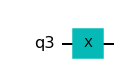

In [18]:
# NOT
qx = QuantumRegister(1)
circuit_x = QuantumCircuit(qx)
circuit_x.x(qx[0])
#qc.measure(q,c)
circuit_x.draw()

x_tt = circuit_to_truthtable(circuit_x)
pd.DataFrame(x_tt, columns=["Input","Output"])

### CX-gate

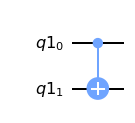

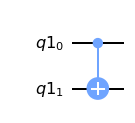

In [4]:
# CNOT
qcx = QuantumRegister(2)
circuit_cx = QuantumCircuit(qcx)
circuit_cx.cx(qcx[0],qcx[1])
#qc.measure(q,c)
circuit_cx.draw()

cx_tt = circuit_to_truthtable(circuit_cx)
pd.DataFrame(cx_tt, columns=["Input","Output"])

### CCX-gate

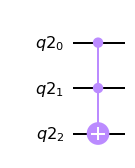

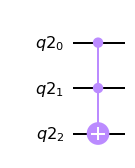

In [5]:
# CCNOT
qccx = QuantumRegister(3)
circuit_ccx = QuantumCircuit(qccx)
circuit_ccx.ccx(qccx[0],qccx[1],qccx[2])
#qc.measure(q,c)
circuit_ccx.draw()

ccx_tt = circuit_to_truthtable(circuit_ccx)
pd.DataFrame(ccx_tt, columns=["Input","Output"])